In [27]:
from fastai.tabular import *
import os
from sklearn import preprocessing


In [28]:
path = Path('/Users/bbabu/fastai/DataSamples')

In [49]:
#df = pd.read_csv(path/'Output-5v2.csv', sep=',', header=0)
#df_test = pd.read_csv(path/'Output-6-Test.csv', sep=',', header=0)

# df = df.set_index("GroupDN")
# df_test = df_test.set_index("GroupDN")




#changed on 7th Oct
df = pd.read_csv(path/'Output-5v5.csv', sep=',', header=0)
df_test = pd.read_csv(path/'Output-5v5-Test.csv', sep=',', header=0)

df = df.fillna(0)
df_test = df_test.fillna(0)

# df = df.groupby('GroupDN')
# df.apply(lambda _df: _df.groupby(by=['GroupDN'])
# df_test = df_test.groupby('GroupDN')
# df.apply(lambda _df: _df_test.groupby(by=['GroupDN'])


In [50]:
#df.head()
# dir(df)

In [51]:
# le = preprocessing.LabelEncoder()
# categorical = list(df.select_dtypes(include=['object']).columns.values)
# for cat in categorical:
#     #print(cat)
#     df[cat].fillna('N/A', inplace=True)
#     df[cat] = le.fit_transform(df[cat].astype(str))

# categorical = list(df_test.select_dtypes(include=['object']).columns.values)
# for cat in categorical:
#     #print(cat)
#     df_test[cat].fillna('N/A', inplace=True)
#     df_test[cat] = le.fit_transform(df_test[cat].astype(str))

# dep_var = 'Owner'
# cont_names = ['GroupDN', 'Member', 'Manager', 'BusinessGroup', 'Platform', 'Title', 'Description', 'Department', 'Country', 'City']
# cat_names = []
# valid_idx = range(len(df)-1000, len(df))
# procs = [FillMissing, Categorify, Normalize]

# data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
#         #.split_by_idx(list(range(1,1000)))
#         #.split_by_idx(valid_idx)
#         .split_by_rand_pct(0.7)
#         .label_from_df(cols=dep_var)
#         .add_test(TabularList.from_df(df_test, cat_names=cat_names, cont_names=cont_names, procs=procs))
#         .databunch())

In [52]:
dep_var = 'Owner'
#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Title', 'Description', 'Department', 'Country', 'State', 'City']
cat_names = ['GroupDN', 'Member', 'Manager', 'BusinessGroup', 'Platform', 'Title', 'Description', 'Department', 'Country', 'City']
#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Title', 'Description', 'Department', 'Country', 'City']
#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Title', 'Department', 'Country', 'City']
#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Country', 'City']
# cont_names = ['Manager']
cont_names = []

#txt_cols = ['Description']

valid_idx = range(len(df)-1000, len(df))
#print(valid_idx)

procs = [FillMissing, Categorify, Normalize]

data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
        #.split_by_idx(list(range(1,1000)))
        #.split_by_idx(valid_idx)
        .split_by_rand_pct(0.7)
        .label_from_df(cols=dep_var)
        .add_test(TabularList.from_df(df_test, cat_names=cat_names, cont_names=cont_names, procs=procs))
        .databunch())

In [53]:

# for v in cat_names: df[v] = df[v].astype('category').cat.as_ordered()

In [54]:
# df.head()

In [55]:
#??TabularDataBunch.from_df

#data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names, cont_names=cont_names)

In [56]:
data.classes

['No', 'Yes']

In [57]:
#learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
#learn = tabular_learner(data, layers=[1000,500], metrics=dice)
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [58]:
# learn.model

In [59]:
learn.summary

<bound method model_summary of Learner(data=TabularDataBunch;

Train: LabelList (351 items)
x: TabularList
GroupDN CN=GTM GLOBAL USER,OU=UP Managed Groups,DC=Na,DC=Corp,DC=Cargill,DC=com; Member a260306; Manager No; BusinessGroup FIBI Shared Resources; Platform Food Ingredients & Bio-Industrial; Title Marketing & Sales FP&A Analyst; Description FIBI Shared Resources - MECHELEN; Department 0; Country Belgium; City MECHELEN; ,GroupDN CN=PCG RD MSALBL56MP,OU=Users,OU=PCG,OU=SharedServices,DC=meat,DC=Cargill,DC=com; Member dlinke; Manager Yes; BusinessGroup Protein; Platform Protein & Salt; Title Sr  PFS Consultant; Description Protein ? BOSC - Corporate Engineering - WICHITA; Department Corporate Engineering; Country United States; City WICHITA; ,GroupDN CN=PCG RD MSALBL56MP,OU=Users,OU=PCG,OU=SharedServices,DC=meat,DC=Cargill,DC=com; Member jasander; Manager No; BusinessGroup Corporate; Platform Corporate; Title OSC Solution Architect; Description Global Information Technology - GIT Regi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


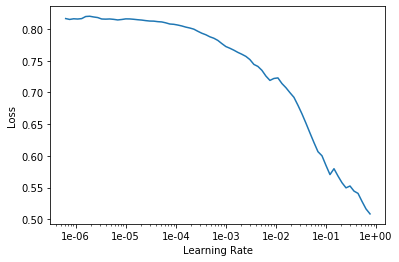

In [60]:
learn.lr_find()
learn.recorder.plot()

In [61]:
learn.fit(5, 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,1.983534,1.089454,0.664225,00:00
1,1.098929,0.291507,0.967033,00:00
2,0.746273,0.281838,0.967033,00:00
3,0.564057,0.324739,0.967033,00:00
4,0.454411,0.201379,0.967033,00:00


In [62]:
# learn.fit_one_cycle(5, 1e-02, wd = 0.2)

In [63]:
row = df.iloc[6]
learn.predict(row)

(Category No, tensor(0), tensor([0.9474, 0.0526]))

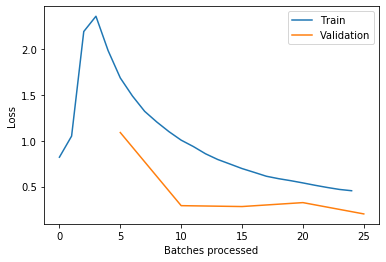

In [64]:
learn.recorder.plot_losses()

[('Yes', 'No', 27)]

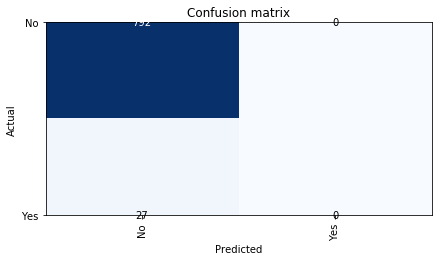

In [65]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused()

In [66]:
learn.unfreeze()
# learn.fit_one_cycle(epochs)
# learn.freeze()
learn.export()

In [67]:
#??learn.get_preds
#??tabular_learner

In [68]:
# learn = load_learner(adult)
# learn = load_learner(path, test=TabularList.from_df(df_test, cat_names=cat_names, cont_names=cont_names, procs=procs))

In [69]:
preds = learn.get_preds(ds_type=DatasetType.Test)[1].numpy()
#preds = learn.get_preds(ds_type=DatasetType.Valid)[1].numpy()

In [70]:
print(preds)
preds.sum()

[0 0 0 0 ... 0 0 0 0]


0

In [24]:
final_df = pd.DataFrame({'GroupDN': df_test['GroupDN'],'Member': df_test['Member'], 'Manager': df_test['Manager'], 'Owner': preds})
final_df.to_csv(path/'MLProcessed-Fastai.csv', header=True, index=False)

In [25]:
learn.show_results()

GroupDN,Member,Manager,BusinessGroup,Platform,Title,Description,Department,Country,City,target,prediction
"CN=cdp_identityiq_read,OU=IdentityIQ Managed Groups,OU=Enterprise,DC=Na,DC=Corp,DC=Cargill,DC=com",#na#,Yes,Corporate,Corporate,#na#,Global Information Technology - GIT Value Enablers TGRC - HOPKINS,GIT Value Enablers TGRC,United States,HOPKINS,No,No
"CN=RtDuet NAHAMMCTS Admins,OU=PI Data Historian,DC=Na,DC=Corp,DC=Cargill,DC=com",#na#,No,Corporate,Corporate,0,#na#,Business Applications,United States,Minneapolis,No,No
"CN=GN-SharePoint-LC-Read,OU=UP Managed Groups,DC=Na,DC=Corp,DC=Cargill,DC=com",p108796,No,Corporate,Corporate,Network_ GCC Management,Global Information Technology - TCS - Infrastructure - Pune,TCS - Infrastructure,India,Pune,No,No
"CN=cdp_identityiq_read,OU=IdentityIQ Managed Groups,OU=Enterprise,DC=Na,DC=Corp,DC=Cargill,DC=com",#na#,No,Global Edible Oil Solutions,Food Ingredients & Bio-Industrial,#na#,#na#,#na#,Netherlands,#na#,No,No
"CN=CARGILL_DairyEnteligen,OU=Users,OU=Minneapolis,OU=GOSCNA,OU=GOSC,DC=Na,DC=Corp,DC=Cargill,DC=com",#na#,No,Premix & Nutrition,Animal Nutrition,#na#,#na#,#na#,United States,HOPKINS,No,No
